# Predicting Pet Adoption Speeds on Petfinder

Dataset can be found on https://www.kaggle.com/c/petfinder-adoption-prediction/data


Motivation for this project was to see what makes certain pets more adoptable,
and whether or not shelters can influence adoption speed with features outside of a pet's inherent physical traits, such as traits pertaining to the listing's photos and bio/description.

# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')

df.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


In [3]:
df.columns

Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID',
       'VideoAmt', 'Description', 'PetID', 'PhotoAmt', 'AdoptionSpeed'],
      dtype='object')

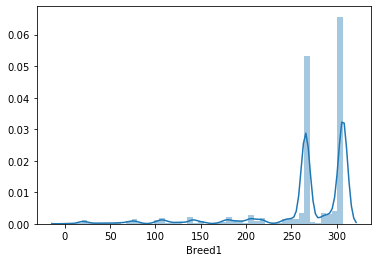

In [4]:
sns.distplot(df.Breed1)

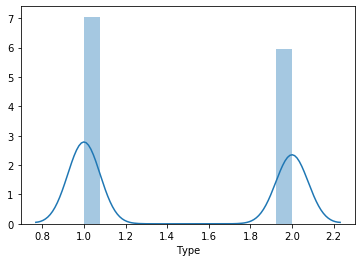

In [5]:
sns.distplot(df.Type)

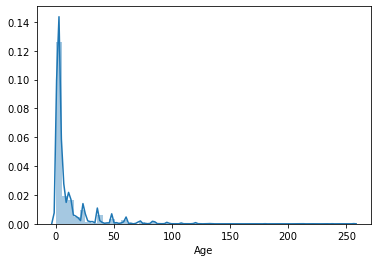

In [6]:
sns.distplot(df.Age)

In [7]:
df.Age.describe()

count    14993.000000
mean        10.452078
std         18.155790
min          0.000000
25%          2.000000
50%          3.000000
75%         12.000000
max        255.000000
Name: Age, dtype: float64

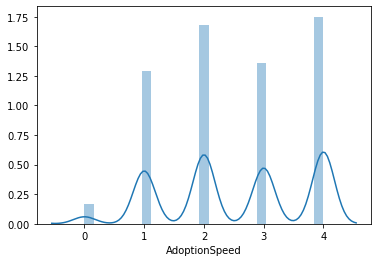

In [8]:
sns.distplot(df.AdoptionSpeed)

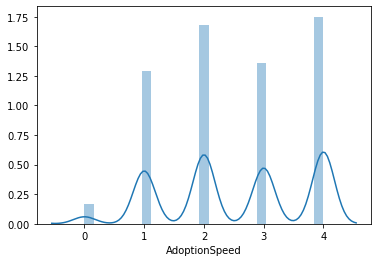

In [9]:
sns.distplot(df.AdoptionSpeed)

In [10]:
df = df.fillna('None')

df.Name = df['Name'].replace(['No Name Yet'], 'None')

In [11]:
df.describe()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
count,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,1.457614,10.452078,265.272594,74.009738,1.776162,2.234176,3.222837,1.882012,1.862002,1.467485,1.731208,1.558727,1.914227,1.036617,1.576069,21.259988,41346.028347,0.056760,3.889215,2.516441
std,0.498217,18.155790,60.056818,123.011575,0.681592,1.745225,2.742562,2.984086,0.547959,0.599070,0.667649,0.695817,0.566172,0.199535,1.472477,78.414548,32.444153,0.346185,3.487810,1.177265
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,41324.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,2.000000,2.000000
50%,1.000000,3.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,3.000000,2.000000
75%,2.000000,12.000000,307.000000,179.000000,2.000000,3.000000,6.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,41401.000000,0.000000,5.000000,4.000000
max,2.000000,255.000000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,20.000000,3000.000000,41415.000000,8.000000,30.000000,4.000000


In [12]:
# Adoption speed currently grouped into 5 buckets
# Would like to consider doing a binary classification (adopted within 3 months or not)

def convert_speed(x):
    if x == 4:
        return 0
    else:
        return 1

df['Adopted']= df.AdoptionSpeed.apply(lambda x: convert_speed(x))

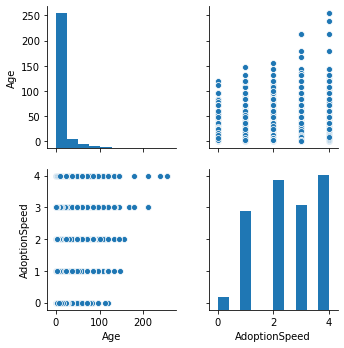

In [13]:
sns.pairplot(df[['Age','AdoptionSpeed']])

In [14]:
# Observe the relationship between speicific breeds and adoption speed

breed_speed = df.groupby(['Type','Breed1'])['AdoptionSpeed'].mean()

breed_speed = pd.DataFrame(breed_speed).reset_index()

breeds = pd.read_csv('breed_labels.csv')

name_speed = pd.merge(breed_speed, breeds, how='left', left_on=['Type','Breed1'], right_on=['Type','BreedID'])

name_speed

,Type,Breed1,AdoptionSpeed,BreedID,BreedName
0,1,0,3.500000,NaN,NaN
1,1,1,4.000000,1.0,Affenpinscher
2,1,3,4.000000,3.0,Airedale Terrier
3,1,5,2.500000,5.0,Akita
4,1,7,4.000000,7.0,American Bulldog
5,1,10,3.000000,10.0,American Staffordshire Terrier
6,1,11,4.000000,11.0,American Water Spaniel
7,1,15,2.500000,15.0,Australian Kelpie
8,1,16,4.000000,16.0,Australian Shepherd
9,1,17,3.000000,17.0,Australian Terrier


In [15]:
# pickle.dump(df, open('df.pickle', 'wb'))

# Data Cleaning, One-Hot Encoding, Feature Engineering

In [16]:
# df = pickle.load(open('df.pickle', 'rb'))

In [17]:
# Create dummies for categorical features  
# Data field descriptions can be found on https://www.kaggle.com/c/petfinder-adoption-prediction/data

genders = pd.get_dummies(df['Gender']).rename(columns={1: "Male", 2: "Female", 3: "Mixed_Genders"})

df = df.join(genders).drop('Gender', axis=1)

types = pd.get_dummies(df['Type']).rename(columns={1: "Dog", 2: "Cat"})

df = df.join(types).drop('Type', axis=1)

mat_size = pd.get_dummies(df['MaturitySize'])\
    .rename(columns={1: "Small_Size", 2: "Medium_Size", 3: "Large_Size", 4: "Extra_Large_Size", 0: "unspecified_size"})

df = df.join(mat_size).drop('MaturitySize', axis=1)

fur_length = pd.get_dummies(df['FurLength'])\
    .rename(columns={1: "Short_Fur", 2: "Medium_Fur", 3: "Long_Fur", 0: "unspecified_size"})

df = df.join(fur_length).drop('FurLength', axis=1)

vaccinated = pd.get_dummies(df['Vaccinated'])\
    .rename(columns={1: "Yes_Vaccinated", 2: "Not_Vaccinated", 3: "Unsure_Vaccinated"})

df = df.join(vaccinated).drop('Vaccinated', axis=1)

dewormed = pd.get_dummies(df['Dewormed'])\
    .rename(columns={1: "Yes_Dewormed", 2: "Not_Dewormed", 3: "Unsure_Dewormed"})

df = df.join(dewormed).drop('Dewormed', axis=1)

sterilized = pd.get_dummies(df['Sterilized'])\
    .rename(columns={1: "Yes_Sterilized", 2: "Not_Sterilized", 3: "Unsure_Sterilized"})

df = df.join(sterilized).drop('Sterilized', axis=1)

health = pd.get_dummies(df['Health'])\
    .rename(columns={1: "Healthy", 2: "Minor_Injury", 3: "Serious_Injury", 0: "unspecified_health"})

df = df.join(health).drop('Health', axis=1)

In [18]:
states = pd.read_csv('state_labels.csv')

df = pd.merge(df,states[['StateID','StateName']], how='left', left_on='State', right_on='StateID').drop('StateID', axis=1)

df = df.join(df['StateName'].str.get_dummies()).drop(['State','StateName'], axis=1)

In [19]:
colors = pd.read_csv('color_labels.csv')

df = pd.merge(df,colors[['ColorID','ColorName']], how='left', left_on='Color1', right_on='ColorID').drop('ColorID', axis=1)

df = pd.merge(df,colors[['ColorID','ColorName']], how='left', left_on='Color2', right_on='ColorID').drop('ColorID', axis=1)

df = pd.merge(df,colors[['ColorID','ColorName']], how='left', left_on='Color3', right_on='ColorID').drop('ColorID', axis=1)

df = df.join(df[['ColorName', 'ColorName_x', 'ColorName_y']].stack().str.get_dummies().sum(level=0))

df = df.drop(['ColorName', 'ColorName_x', 'ColorName_y', 'Color1', 'Color2', 'Color3'], axis=1)

In [20]:
# Clean up breed information
# Data includes two fields for breeds:  Breed1 and Breed2
# Entry of '0' represents no secondary breed; need to clean entries so single breeds are listed in Breed1 only

df.loc[df.Breed1 == 0, 'Breed1'] = df.Breed2

df.loc[df.Breed1 == df.Breed2, 'Breed2'] = 0

In [21]:
# Create feature for pet being mixed breed
# Entry of '307' represents mixed breed, but many pets also have two distinct breeds listed

def is_mixed(row):
    if row.Breed1 == 307:
        val = 1
    elif row.Breed2 == 307:
        val = 1
    elif row.Breed2 == 0:
        val = 0
    else:
        val = 1
    return val

df['mixed_breed'] = df.apply(is_mixed, axis=1)

In [23]:
# There are 307 different breed labels with many having very few observations
# Grouped all breeds outside of the top 60 in frequency and labeled as 'other_breed' before creating dummies

other_breeds_list = list(df.groupby('Breed1')['Name'].count().sort_values(ascending=False)[60:].reset_index()['Breed1'])

def is_other_breed(breed):
    if breed in other_breeds_list:
        return 308
    else:
        return breed

df.Breed1 = df.Breed1.apply(lambda x: is_other_breed(x))
df.Breed2 = df.Breed2.apply(lambda x: is_other_breed(x))

breeds = pd.read_csv('breed_labels.csv')

breeds = breeds.append({'BreedID': 308, 'BreedName': 'other_breed'}, ignore_index=True)

df = pd.merge(df,breeds[['BreedID','BreedName']], how='left', left_on='Breed1', right_on='BreedID')

df = df.drop('BreedID', axis=1)

df = pd.merge(df,breeds[['BreedID','BreedName']], how='left', left_on='Breed2', right_on='BreedID')

df = df.join(df[['BreedName_x','BreedName_y']].stack().str.get_dummies().sum(level=0))

df = df.drop(['Breed1','Breed2','BreedName_x','BreedID','BreedName_y','Name','RescuerID'], axis=1)

In [24]:
pd.options.display.max_seq_items = 1000
df.columns

Index(['Age', 'Quantity', 'Fee', 'VideoAmt', 'Description', 'PetID',
       'PhotoAmt', 'AdoptionSpeed', 'Adopted', 'Male', 'Female',
       'Mixed_Genders', 'Dog', 'Cat', 'Small_Size', 'Medium_Size',
       'Large_Size', 'Extra_Large_Size', 'Short_Fur', 'Medium_Fur', 'Long_Fur',
       'Yes_Vaccinated', 'Not_Vaccinated', 'Unsure_Vaccinated', 'Yes_Dewormed',
       'Not_Dewormed', 'Unsure_Dewormed', 'Yes_Sterilized', 'Not_Sterilized',
       'Unsure_Sterilized', 'Healthy', 'Minor_Injury', 'Serious_Injury',
       'Johor', 'Kedah', 'Kelantan', 'Kuala Lumpur', 'Labuan', 'Melaka',
       'Negeri Sembilan', 'Pahang', 'Perak', 'Pulau Pinang', 'Sabah',
       'Sarawak', 'Selangor', 'Terengganu', 'Black', 'Brown', 'Cream',
       'Golden', 'Gray', 'White', 'Yellow', 'mixed_breed', 'Abyssinian',
       'Afghan Hound', 'Akbash', 'American Curl', 'American Shorthair',
       'Australian Cattle Dog/Blue Heeler', 'Beagle',
       'Belgian Shepherd Malinois', 'Bengal', 'Bluetick Coonhound', 'Bobtai

In [25]:
# pickle.dump(df, open('df_dummies.pickle', 'wb'))

# Adding Text/Bio Features

In [26]:
import re
import string
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [27]:
# Create new dataframe with ID and bio, then clean before quanitfying with TextBlob and vaderSentiment

df_text = df[['PetID','Description']]

df_text = df_text.applymap(lambda x: x.strip().replace('\n\n', ' ').replace('\n', ' '))

def clean1(text):
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[‘’“”…]', '', text)
    text = text.replace('／', ' ')
    return text

df_text.Description = df_text.Description.apply(lambda x: clean1(x))

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

df_text['polarity'] = df_text['Description'].apply(pol)
df_text['subjectivity'] = df_text['Description'].apply(sub)
df_text['description_words'] = df_text.Description.apply(lambda x: len(x.split()))

In [28]:
analyser = SentimentIntensityAnalyzer()

analyser.polarity_scores(df_text.Description[0])['compound']

df_text['vader_sentiment'] = df_text.Description.apply(lambda x:  analyser.polarity_scores(x)['compound'])

df_text.head()

,PetID,Description,polarity,subjectivity,description_words,vader_sentiment
0,86e1089a3,Nibble is a month old ball of cuteness He is ...,0.130357,0.407143,68,0.9552
1,6296e909a,I just found it alone yesterday near my apartm...,0.100000,0.400000,23,0.1280
2,3422e4906,Their pregnant mother was dumped by her irresp...,0.261905,0.542857,69,0.7650
3,5842f1ff5,Good guard dog very alert active obedience wai...,0.327083,0.437500,25,0.9494
4,850a43f90,This handsome yet cute boy is up for adoption ...,0.400000,0.743750,79,0.9880


In [29]:
# Create two more features for inclusion of 'cute' and 'frinedly' in bio

def is_cute(x):
    if 'cute' in x:
        return 1
    elif 'Cute' in x:
        return 1
    else:
        return 0

df_text['is_cute'] = df_text.Description.apply(lambda x: is_cute(x))

def is_friendly(x):
    if 'friend' in x:
        return 1
    elif 'Friend' in x:
        return 1
    else:
        return 0

df_text['is_friendly'] = df_text.Description.apply(lambda x: is_friendly(x))

In [30]:
# pickle.dump(df_text, open('df_nlp.pickle', 'wb'))

In [31]:
df = pd.merge(df, \
              df_text[['PetID','polarity','subjectivity','description_words','vader_sentiment','is_cute','is_friendly']],\
              how='left', left_on='PetID', right_on='PetID')

# Adding Image Features

In [32]:
# !pip install opencv-python
import cv2
from PIL import Image, ImageStat
import os

In [33]:
def get_imlist(path):
    return [os.path.join(path,f) for f in os.listdir(path) if f.endswith('.jpg')]

len(get_imlist('train_images/'))

58311

In [34]:
def brightness(im_file):
    im = Image.open(im_file).convert('L')
    stat = ImageStat.Stat(im)
    return stat.mean[0]

In [35]:
def brightness_images(path):
    collection = []
    pet_ids = []
    for image in os.listdir(path):
        if image[-6:] == "-1.jpg":
            collection.append(brightness(path + str(image)))
            pet_ids.append(image[:9])
    return collection, pet_ids

In [36]:
brightness, pet_ids = brightness_images('train_images/')

In [37]:
df_brightness = pd.DataFrame(list(zip(pet_ids, brightness)), 
               columns =['PetID', 'brightness'])

In [38]:
# pickle.dump(df_brightness, open('df_brightness.pickle','wb'))

In [39]:
def get_size(im_file):
    image = cv2.imread(im_file)
    size = image.shape[0] * image.shape[1]
    return size

In [40]:
def size_images(path):
    collection = []
    pet_ids = []
    for image in os.listdir(path):
        if image[-6:] == "-1.jpg":
            collection.append(get_size(path + str(image)))
            pet_ids.append(image[:9])
    return collection, pet_ids

In [41]:
sizes, pet_ids = size_images('train_images/')

In [42]:
df_image_size = pd.DataFrame(list(zip(pet_ids, sizes)), 
               columns =['PetID', 'image_size'])

In [43]:
# pickle.dump(df_image_size, open('df_image_size.pickle','wb'))

In [44]:
df = pd.merge(df, df_brightness[['PetID','brightness']],\
                        how='left', left_on='PetID', right_on='PetID')

df.brightness = df.brightness.fillna(df.brightness.mean())

In [45]:
df = pd.merge(df, df_image_size[['PetID','image_size']],\
                        how='left', left_on='PetID', right_on='PetID')

df.image_size = df.image_size.fillna(0)

In [46]:
df.columns

Index(['Age', 'Quantity', 'Fee', 'VideoAmt', 'Description', 'PetID',
       'PhotoAmt', 'AdoptionSpeed', 'Adopted', 'Male', 'Female',
       'Mixed_Genders', 'Dog', 'Cat', 'Small_Size', 'Medium_Size',
       'Large_Size', 'Extra_Large_Size', 'Short_Fur', 'Medium_Fur', 'Long_Fur',
       'Yes_Vaccinated', 'Not_Vaccinated', 'Unsure_Vaccinated', 'Yes_Dewormed',
       'Not_Dewormed', 'Unsure_Dewormed', 'Yes_Sterilized', 'Not_Sterilized',
       'Unsure_Sterilized', 'Healthy', 'Minor_Injury', 'Serious_Injury',
       'Johor', 'Kedah', 'Kelantan', 'Kuala Lumpur', 'Labuan', 'Melaka',
       'Negeri Sembilan', 'Pahang', 'Perak', 'Pulau Pinang', 'Sabah',
       'Sarawak', 'Selangor', 'Terengganu', 'Black', 'Brown', 'Cream',
       'Golden', 'Gray', 'White', 'Yellow', 'mixed_breed', 'Abyssinian',
       'Afghan Hound', 'Akbash', 'American Curl', 'American Shorthair',
       'Australian Cattle Dog/Blue Heeler', 'Beagle',
       'Belgian Shepherd Malinois', 'Bengal', 'Bluetick Coonhound', 'Bobtai

In [47]:
# pickle.dump(df, open('df_modeling.pickle','wb'))

# Initial Modeling

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, f1_score, fbeta_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import xgboost as xgb

In [49]:
# df = pickle.load(open('df_modeling.pickle', 'rb'))

In [50]:
# Before modeling with binary classification (adopted within 3 months or not),
# I did initial multiclass modeling on the provided dependent variable 'AdoptionSpeed'
# which had 5 distinct time buckets as outcomes, but only achieved ~40% accuracy with XGBoost.
# As my goal was to find the top predictors for adoption, scarificing so much accuracy 
# for more granularity did not make much sense, so I proceeded to do my analysis using ionly binary classes.

X, y = df.drop(['PetID','Description','AdoptionSpeed','Adopted'], axis=1), df.Adopted

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [51]:
lr = LogisticRegression()
lr.fit(X,y)

print("Accuracy = ", lr.score(X_test, y_test))

y_predict = lr.predict(X_test)
print("F1 Score = ", f1_score(y_test, y_predict, average=None))

fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
print("ROC AUC score = ", roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]))

print(confusion_matrix(y_test, lr.predict(X_test)))

Accuracy =  0.7222407469156386
F1 Score =  [0.         0.83872217]
ROC AUC score =  0.5391452980084
[[   0  833]
 [   0 2166]]


/home/rob/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rob/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [52]:
tree = RandomForestClassifier()
tree.fit(X,y)

print("Accuracy = ", tree.score(X_test, y_test))

y_predict = tree.predict(X_test)
print("F1 Score = ", f1_score(y_test, y_predict))

fpr, tpr, thresholds = roc_curve(y_test, tree.predict_proba(X_test)[:,1])
print("ROC AUC score = ", roc_auc_score(y_test, tree.predict_proba(X_test)[:,1]))

print(confusion_matrix(y_test, tree.predict(X_test)))

/home/rob/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy =  0.7435811937312438
F1 Score =  0.830654040960141
ROC AUC score =  0.7391286154350937
[[ 344  489]
 [ 280 1886]]


In [53]:
sorted(list(zip(list(X.columns),list(tree.feature_importances_))), key=lambda tup: tup[1], reverse=True)

[('Age', 0.08572337084855579),
 ('description_words', 0.06995446471765895),
 ('image_size', 0.06947466493033491),
 ('vader_sentiment', 0.06899386944789934),
 ('brightness', 0.06586474895316764),
 ('polarity', 0.06523230080875632),
 ('subjectivity', 0.06255888188374113),
 ('PhotoAmt', 0.047953070799758246),
 ('Quantity', 0.025316614163220133),
 ('Not_Sterilized', 0.019139217279831314),
 ('Fee', 0.017728058402756718),
 ('Black', 0.014824105401960096),
 ('Mixed Breed', 0.013786349325923423),
 ('White', 0.013536662373042251),
 ('Brown', 0.01325065006715159),
 ('Selangor', 0.011694380424793533),
 ('is_friendly', 0.011585529036253775),
 ('Medium_Size', 0.011051676692367304),
 ('Small_Size', 0.010641205193625188),
 ('mixed_breed', 0.010583758824121594),
 ('Female', 0.010568509776372487),
 ('Short_Fur', 0.010562613289245591),
 ('Medium_Fur', 0.010313284974685534),
 ('Male', 0.010195186970782736),
 ('Kuala Lumpur', 0.009737057614479246),
 ('Cream', 0.009672859471738184),
 ('Not_Vaccinated', 0.0

In [54]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

print("Accuracy = ", knn.score(X_test, y_test))

y_predict = knn.predict(X_test)
print("F1 Score = ", f1_score(y_test, y_predict, average=None))

fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
print("ROC AUC score = ", roc_auc_score(y_test, knn.predict_proba(X_test)[:,1]))

print(confusion_matrix(y_test, knn.predict(X_test)))

Accuracy =  0.6962320773591197
F1 Score =  [0.32468495 0.80404388]
ROC AUC score =  0.6116726468980944
[[ 219  614]
 [ 297 1869]]


In [55]:
nb = GaussianNB()
nb.fit(X,y)

print("Accuracy = ", nb.score(X_test, y_test))

y_predict = nb.predict(X_test)
print("F1 Score = ", f1_score(y_test, y_predict, average=None))

fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
print("ROC AUC score = ", roc_auc_score(y_test, nb.predict_proba(X_test)[:,1]))

print(confusion_matrix(y_test, nb.predict(X_test)))

Accuracy =  0.7012337445815272
F1 Score =  [0.17343173 0.81766382]
ROC AUC score =  0.6193956807099571
[[  94  739]
 [ 157 2009]]


In [56]:
nb = BernoulliNB()
nb.fit(X,y)

print("Accuracy = ", nb.score(X_test, y_test))

y_predict = nb.predict(X_test)
print("F1 Score = ", f1_score(y_test, y_predict, average=None))

fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
print("ROC AUC score = ", roc_auc_score(y_test, nb.predict_proba(X_test)[:,1]))

print(confusion_matrix(y_test, nb.predict(X_test)))

Accuracy =  0.7195731910636879
F1 Score =  [0.42828008 0.81422576]
ROC AUC score =  0.6820376349985977
[[ 315  518]
 [ 323 1843]]


In [57]:
gbm = xgb.XGBClassifier( 
                       n_estimators=30000, 
                       max_depth=4,
                       objective="binary:logistic",
                       learning_rate=.1, 
                       subsample=1,
                       min_child_weight=1,
                       colsample_bytree=.8
                      )

eval_set=[(X,y),(X_test,y_test)] 

fit_model = gbm.fit( 
                    X, y, 
                    eval_set=eval_set,
                    eval_metric='rmse',
                    early_stopping_rounds=20
                   )

[0]	validation_0-rmse:0.485875	validation_1-rmse:0.485709
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 20 rounds.
[1]	validation_0-rmse:0.475335	validation_1-rmse:0.474823
[2]	validation_0-rmse:0.465179	validation_1-rmse:0.46431
[3]	validation_0-rmse:0.457667	validation_1-rmse:0.456517
[4]	validation_0-rmse:0.450298	validation_1-rmse:0.448964
[5]	validation_0-rmse:0.444118	validation_1-rmse:0.442826
[6]	validation_0-rmse:0.438941	validation_1-rmse:0.437557
[7]	validation_0-rmse:0.434488	validation_1-rmse:0.433122
[8]	validation_0-rmse:0.430767	validation_1-rmse:0.429431
[9]	validation_0-rmse:0.427567	validation_1-rmse:0.42646
[10]	validation_0-rmse:0.424656	validation_1-rmse:0.423836
[11]	validation_0-rmse:0.422289	validation_1-rmse:0.421555
[12]	validation_0-rmse:0.420254	validation_1-rmse:0.419506
[13]	validation_0-rmse:0.418472	validation_1-rmse:0.417805
[14]	validation_0-rmse:0.41

[137]	validation_0-rmse:0.376332	validation_1-rmse:0.394997
[138]	validation_0-rmse:0.376212	validation_1-rmse:0.395106
[139]	validation_0-rmse:0.376062	validation_1-rmse:0.395083
[140]	validation_0-rmse:0.37602	validation_1-rmse:0.395065
[141]	validation_0-rmse:0.375711	validation_1-rmse:0.395072
[142]	validation_0-rmse:0.375522	validation_1-rmse:0.395048
[143]	validation_0-rmse:0.375437	validation_1-rmse:0.394998
[144]	validation_0-rmse:0.375367	validation_1-rmse:0.394971
[145]	validation_0-rmse:0.375208	validation_1-rmse:0.394945
[146]	validation_0-rmse:0.375017	validation_1-rmse:0.39495
[147]	validation_0-rmse:0.374868	validation_1-rmse:0.394942
[148]	validation_0-rmse:0.374728	validation_1-rmse:0.394914
[149]	validation_0-rmse:0.374571	validation_1-rmse:0.394895
[150]	validation_0-rmse:0.374273	validation_1-rmse:0.394946
[151]	validation_0-rmse:0.374179	validation_1-rmse:0.39492
[152]	validation_0-rmse:0.373985	validation_1-rmse:0.394912
[153]	validation_0-rmse:0.37354	validation_

In [59]:
best_preds = gbm.predict(X_test, ntree_limit=gbm.best_ntree_limit)

print("Accuracy = ", accuracy_score(y_test, best_preds))

print("F1 Score = ", f1_score(y_test, best_preds, average=None))

print(confusion_matrix(y_test, best_preds))

Accuracy =  0.7719239746582194
F1 Score =  [0.48878924 0.85321888]
[[ 327  506]
 [ 178 1988]]


In [60]:
def rmse(actuals, preds):
    return np.sqrt(((actuals - preds) ** 2).mean())

In [61]:
rmse(lr.predict(X_test), y_test)

0.5270287023344757

In [62]:
rmse(tree.predict(X_test), y_test)

0.5063781257802871

In [63]:
rmse(knn.predict(X_test), y_test)

0.5511514516363722

In [64]:
rmse(nb.predict(X_test), y_test)

0.5295534051786581

In [65]:
rmse(gbm.predict(X_test, ntree_limit=gbm.best_ntree_limit),y_test)

0.4775730575961971

In [66]:
print(classification_report(y_test, gbm.predict(X_test)))

              precision    recall  f1-score   support

           0       0.65      0.39      0.49       833
           1       0.80      0.92      0.85      2166

    accuracy                           0.77      2999
   macro avg       0.72      0.66      0.67      2999
weighted avg       0.76      0.77      0.75      2999



# Cross Validation Tuning

In [67]:
from sklearn.model_selection import KFold, cross_val_score
import pprint

In [68]:
# As seen from the results in the last section, XGBoost outperformed all other models with minimal adjustments
# to hyperparameters.  Here we tweak the model more rigorously, although the method I used is quite 
# manual and should be more streamlined.  I start with the most impactful hyperparameters first and work my way down.

X, y = df.drop(['PetID','Description','AdoptionSpeed','Adopted'], axis=1), df.Adopted

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=42)

X, y = np.array(X), np.array(y)

In [69]:
# Tuning max_depth

def fit_and_score(hyperparameter, X, y):
    kf = KFold(n_splits=5, shuffle=True, random_state = 1)

    cv_gbm_score = []
    gbm_train = []

    gbm_roc = []
    gbm_roc_train = []

    gbm_rmse= []
    gbm_rmse_train= []

    for train_ind, val_ind in kf.split(X,y):

        X_train, y_train = X[train_ind], y[train_ind]
        X_val, y_val = X[val_ind], y[val_ind]

        gbm = xgb.XGBClassifier( 
                           n_estimators=30000,
                           max_depth=hyperparameter,
                           objective="binary:logistic",
                           learning_rate=.1, 
                           subsample=1,
                           min_child_weight=1,
                           colsample_bytree=.8
                          )
        eval_set = [(X_train, y_train), (X_val, y_val)]
        fit_model = gbm.fit(X_train, y_train, eval_set=eval_set, \
                            eval_metric='rmse',verbose=False, early_stopping_rounds=20)
        cv_gbm_score.append(f1_score(y_val, gbm.predict(X_val)))
        gbm_train.append(f1_score(y_train, gbm.predict(X_train)))
        gbm_roc.append(roc_auc_score(y_val, gbm.predict_proba(X_val)[:,1]))
        gbm_roc_train.append(roc_auc_score(y_train, gbm.predict_proba(X_train)[:,1]))
        gbm_rmse.append(rmse(y_val, gbm.predict(X_val)))
        gbm_rmse_train.append(rmse(y_train, gbm.predict(X_train)))

        
    F1_train = (f'{np.mean(gbm_train):.3f} +- {np.std(gbm_train):.3f}')
    F1_val = (f'{np.mean(cv_gbm_score):.3f} +- {np.std(cv_gbm_score):.3f}')
    ROC_train = (f'{np.mean(gbm_roc_train):.3f} +- {np.std(gbm_roc_train):.3f}')
    ROC_val = (f'{np.mean(gbm_roc):.3f} +- {np.std(gbm_roc):.3f}')
    rmse_train = (f'{np.mean(gbm_rmse_train):.3f} +- {np.std(gbm_rmse_train):.3f}')
    rmse_val = (f'{np.mean(gbm_rmse):.3f} +- {np.std(gbm_rmse):.3f}')
    
    return {'F1 train': F1_train, 'F1 val': F1_val, 'ROC train': ROC_train, 'ROC val': ROC_val,\
            'rmse train': rmse_train, 'rmse val': rmse_val} 

In [70]:
# max_depth = 6 produced best results

for x in range(3,9):
    print("max depth " + str(x) + ": ")
    pprint.pprint(fit_and_score(x, X, y))
    print(" ")

max depth 3: 
{'F1 train': '0.868 +- 0.002',
 'F1 val': '0.846 +- 0.003',
 'ROC train': '0.832 +- 0.004',
 'ROC val': '0.772 +- 0.006',
 'rmse train': '0.455 +- 0.004',
 'rmse val': '0.492 +- 0.004'}
 
max depth 4: 
{'F1 train': '0.879 +- 0.004',
 'F1 val': '0.848 +- 0.002',
 'ROC train': '0.862 +- 0.010',
 'ROC val': '0.775 +- 0.006',
 'rmse train': '0.434 +- 0.008',
 'rmse val': '0.488 +- 0.004'}
 
max depth 5: 
{'F1 train': '0.885 +- 0.003',
 'F1 val': '0.847 +- 0.003',
 'ROC train': '0.877 +- 0.007',
 'ROC val': '0.774 +- 0.007',
 'rmse train': '0.422 +- 0.005',
 'rmse val': '0.490 +- 0.004'}
 
max depth 6: 
{'F1 train': '0.903 +- 0.007',
 'F1 val': '0.847 +- 0.002',
 'ROC train': '0.910 +- 0.013',
 'ROC val': '0.778 +- 0.007',
 'rmse train': '0.387 +- 0.014',
 'rmse val': '0.489 +- 0.003'}
 
max depth 7: 
{'F1 train': '0.922 +- 0.003',
 'F1 val': '0.847 +- 0.004',
 'ROC train': '0.943 +- 0.005',
 'ROC val': '0.777 +- 0.007',
 'rmse train': '0.346 +- 0.007',
 'rmse val': '0.488 +- 

In [71]:
# Tuning subsample

def fit_and_score(hyperparameter, X, y):
    kf = KFold(n_splits=5, shuffle=True, random_state = 1)

    cv_gbm_score = []
    gbm_train = []

    gbm_roc = []
    gbm_roc_train = []

    gbm_rmse= []
    gbm_rmse_train= []

    for train_ind, val_ind in kf.split(X,y):

        X_train, y_train = X[train_ind], y[train_ind]
        X_val, y_val = X[val_ind], y[val_ind]

        gbm = xgb.XGBClassifier( 
                           n_estimators=30000,
                           max_depth=6,
                           objective="binary:logistic",
                           learning_rate=.1, 
                           subsample=hyperparameter,
                           min_child_weight=1,
                           colsample_bytree=.8
                          )
        eval_set = [(X_train, y_train), (X_val, y_val)]
        fit_model = gbm.fit(X_train, y_train, eval_set=eval_set, \
                            eval_metric='rmse',verbose=False, early_stopping_rounds=20)
        cv_gbm_score.append(f1_score(y_val, gbm.predict(X_val)))
        gbm_train.append(f1_score(y_train, gbm.predict(X_train)))
        gbm_roc.append(roc_auc_score(y_val, gbm.predict_proba(X_val)[:,1]))
        gbm_roc_train.append(roc_auc_score(y_train, gbm.predict_proba(X_train)[:,1]))
        gbm_rmse.append(rmse(y_val, gbm.predict(X_val)))
        gbm_rmse_train.append(rmse(y_train, gbm.predict(X_train)))

    F1_train = (f'{np.mean(gbm_train):.3f} +- {np.std(gbm_train):.3f}')
    F1_val = (f'{np.mean(cv_gbm_score):.3f} +- {np.std(cv_gbm_score):.3f}')
    ROC_train = (f'{np.mean(gbm_roc_train):.3f} +- {np.std(gbm_roc_train):.3f}')
    ROC_val = (f'{np.mean(gbm_roc):.3f} +- {np.std(gbm_roc):.3f}')
    rmse_train = (f'{np.mean(gbm_rmse_train):.3f} +- {np.std(gbm_rmse_train):.3f}')
    rmse_val = (f'{np.mean(gbm_rmse):.3f} +- {np.std(gbm_rmse):.3f}')
    
    return {'F1 train': F1_train, 'F1 val': F1_val, 'ROC train': ROC_train, 'ROC val': ROC_val,\
            'rmse train': rmse_train, 'rmse val': rmse_val} 

In [72]:
# subsample = .9 produced best results

for x in [0.8,.9,1]:
    pprint.pprint(fit_and_score(x, X, y))

{'F1 train': '0.908 +- 0.006',
 'F1 val': '0.848 +- 0.002',
 'ROC train': '0.924 +- 0.011',
 'ROC val': '0.781 +- 0.005',
 'rmse train': '0.374 +- 0.013',
 'rmse val': '0.487 +- 0.004'}
{'F1 train': '0.910 +- 0.011',
 'F1 val': '0.848 +- 0.003',
 'ROC train': '0.922 +- 0.019',
 'ROC val': '0.780 +- 0.005',
 'rmse train': '0.371 +- 0.025',
 'rmse val': '0.487 +- 0.003'}
{'F1 train': '0.903 +- 0.007',
 'F1 val': '0.847 +- 0.002',
 'ROC train': '0.910 +- 0.013',
 'ROC val': '0.778 +- 0.007',
 'rmse train': '0.387 +- 0.014',
 'rmse val': '0.489 +- 0.003'}


In [73]:
# Tuning colsample_bytree

def fit_and_score(hyperparameter, X, y):
    kf = KFold(n_splits=5, shuffle=True, random_state = 1)

    cv_gbm_score = []
    gbm_train = []

    gbm_roc = []
    gbm_roc_train = []

    gbm_rmse= []
    gbm_rmse_train= []

    for train_ind, val_ind in kf.split(X,y):

        X_train, y_train = X[train_ind], y[train_ind]
        X_val, y_val = X[val_ind], y[val_ind]

        gbm = xgb.XGBClassifier( 
                           n_estimators=10000,
                           max_depth=6,
                           objective="binary:logistic",
                           learning_rate=.1, 
                           subsample=.9,
                           min_child_weight=1,
                           colsample_bytree=hyperparameter
                          )
        eval_set = [(X_train, y_train), (X_val, y_val)]
        fit_model = gbm.fit(X_train, y_train, eval_set=eval_set, \
                            eval_metric='rmse',verbose=False, early_stopping_rounds=20)
        cv_gbm_score.append(f1_score(y_val, gbm.predict(X_val)))
        gbm_train.append(f1_score(y_train, gbm.predict(X_train)))
        gbm_roc.append(roc_auc_score(y_val, gbm.predict_proba(X_val)[:,1]))
        gbm_roc_train.append(roc_auc_score(y_train, gbm.predict_proba(X_train)[:,1]))
        gbm_rmse.append(rmse(y_val, gbm.predict(X_val)))
        gbm_rmse_train.append(rmse(y_train, gbm.predict(X_train)))

    F1_train = (f'{np.mean(gbm_train):.3f} +- {np.std(gbm_train):.3f}')
    F1_val = (f'{np.mean(cv_gbm_score):.3f} +- {np.std(cv_gbm_score):.3f}')
    ROC_train = (f'{np.mean(gbm_roc_train):.3f} +- {np.std(gbm_roc_train):.3f}')
    ROC_val = (f'{np.mean(gbm_roc):.3f} +- {np.std(gbm_roc):.3f}')
    rmse_train = (f'{np.mean(gbm_rmse_train):.3f} +- {np.std(gbm_rmse_train):.3f}')
    rmse_val = (f'{np.mean(gbm_rmse):.3f} +- {np.std(gbm_rmse):.3f}')
    
    return {'F1 train': F1_train, 'F1 val': F1_val, 'ROC train': ROC_train, 'ROC val': ROC_val,\
            'rmse train': rmse_train, 'rmse val': rmse_val} 

In [74]:
#  colsample_bytree = .8 produced best results

for x in [.3,.4,.5,.6,.7,.8,.9]:
    pprint.pprint(fit_and_score(x, X, y))

{'F1 train': '0.916 +- 0.007',
 'F1 val': '0.850 +- 0.002',
 'ROC train': '0.937 +- 0.011',
 'ROC val': '0.779 +- 0.003',
 'rmse train': '0.359 +- 0.015',
 'rmse val': '0.485 +- 0.003'}
{'F1 train': '0.906 +- 0.006',
 'F1 val': '0.848 +- 0.002',
 'ROC train': '0.918 +- 0.011',
 'ROC val': '0.780 +- 0.006',
 'rmse train': '0.381 +- 0.013',
 'rmse val': '0.488 +- 0.003'}
{'F1 train': '0.906 +- 0.007',
 'F1 val': '0.848 +- 0.004',
 'ROC train': '0.918 +- 0.013',
 'ROC val': '0.779 +- 0.007',
 'rmse train': '0.381 +- 0.015',
 'rmse val': '0.488 +- 0.007'}
{'F1 train': '0.915 +- 0.007',
 'F1 val': '0.848 +- 0.004',
 'ROC train': '0.933 +- 0.014',
 'ROC val': '0.779 +- 0.006',
 'rmse train': '0.359 +- 0.017',
 'rmse val': '0.486 +- 0.005'}
{'F1 train': '0.910 +- 0.004',
 'F1 val': '0.847 +- 0.004',
 'ROC train': '0.924 +- 0.008',
 'ROC val': '0.778 +- 0.007',
 'rmse train': '0.371 +- 0.010',
 'rmse val': '0.489 +- 0.005'}
{'F1 train': '0.910 +- 0.011',
 'F1 val': '0.848 +- 0.003',
 'ROC trai

# Final Model and Results

In [82]:
# Train final model on 80% of observations, test on 20%

X, y = df.drop(['Cat','PetID','Description','AdoptionSpeed','Adopted'], axis=1), df.Adopted

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=42)

gbm = xgb.XGBClassifier(n_estimators=10000,
                       max_depth=6,
                       objective="binary:logistic",
                       learning_rate=.1, 
                       subsample=.9,
                       min_child_weight=1,
                       colsample_bytree=.8)

eval_set=[(X,y),(X_test,y_test)]

fit_model = gbm.fit(X, y, 
                    eval_set=eval_set,
                    eval_metric='rmse',
                    early_stopping_rounds=20,
                    verbose=False)

print("Accuracy = ", gbm.score(X_test, y_test))

y_predict = gbm.predict(X_test)
print("F1 Score = ", f1_score(y_test, y_predict))

fpr, tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])
print("ROC AUC score = ", roc_auc_score(y_test, gbm.predict_proba(X_test)[:,1]))

print("rmse = ", rmse(y_test, gbm.predict(X_test)))

print(confusion_matrix(y_test, gbm.predict(X_test)))

Accuracy =  0.7809269756585528
F1 Score =  0.8586184635248548
ROC AUC score =  0.8024151488850388
rmse =  0.4680523735026318
[[ 347  486]
 [ 171 1995]]


In [83]:
# List top features according to gain scores

sorted(gbm.get_booster().get_score(importance_type='gain').items(), key = lambda x: x[1], reverse=True)

[('Not_Sterilized', 20.058148943718972),
 ('Mixed Breed', 18.759450730411764),
 ('Dog', 14.75421963088636),
 ('Age', 11.515788504172066),
 ('Long_Fur', 9.5842514396),
 ('Melaka', 8.447650442),
 ('Minor_Injury', 8.148659098888889),
 ('Quantity', 7.62016980941667),
 ('Dalmatian', 6.627895355),
 ('Persian', 6.557071998461536),
 ('PhotoAmt', 6.461978082837079),
 ('image_size', 5.5423133532775894),
 ('Perak', 5.455358605384616),
 ('Pulau Pinang', 5.386957052289473),
 ('Terrier', 5.301886247692308),
 ('Unsure_Sterilized', 5.29457483747059),
 ('Small_Size', 5.232240890244827),
 ('Selangor', 5.230404655290323),
 ('German Shepherd Dog', 5.1946661871428566),
 ('Rottweiler', 5.160241304347826),
 ('Labrador Retriever', 5.054260605882353),
 ('Domestic Short Hair', 5.035708291212122),
 ('Johor', 4.9977798686111115),
 ('Negeri Sembilan', 4.9754287625),
 ('American Shorthair', 4.951621983636363),
 ('Domestic Long Hair', 4.8987060775),
 ('Not_Dewormed', 4.814025801999998),
 ('Bobtail', 4.68378067),
 ('

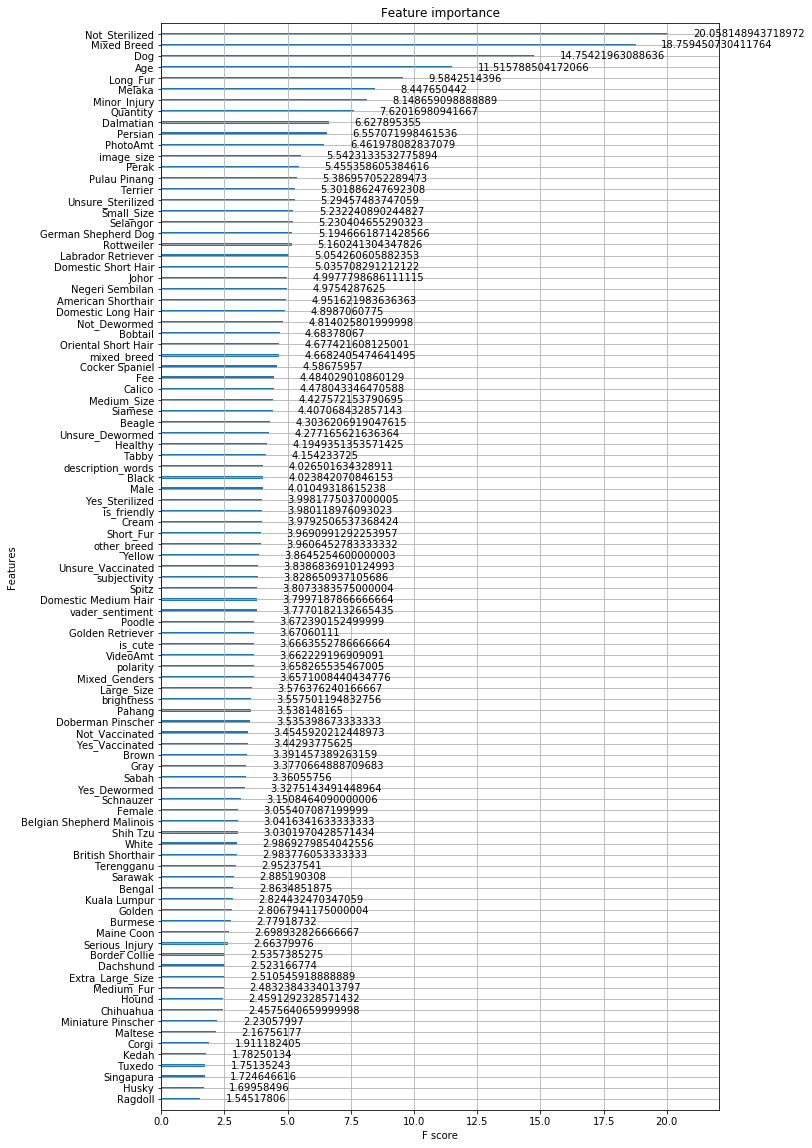

In [86]:
fig, ax = plt.subplots(figsize=(10, 20))

xgb.plot_importance(gbm, importance_type='gain', ax=ax)